# Stock Market Prediction using CNN-LSTM model

In [3]:
#!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 6.4 MB 7.8 MB/s 
     |████████████████████████████████| 62 kB 1.4 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.28.0 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [4]:
import yfinance as yf
import pandas as pd
import numpy as np
import math
import seaborn as sns
import datetime as dt
from datetime import datetime
from sklearn.model_selection import train_test_split
sns.set_style("whitegrid")
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
df_aapl = yf.download("AAPL", start="2018-01-01", end="2021-01-01")
df_aapl.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-01-02,42.540001,43.075001,42.314999,43.064999,41.075405,102223600
2018-01-03,43.132500,43.637501,42.990002,43.057499,41.068256,118071600
2018-01-04,43.134998,43.367500,43.020000,43.257500,41.259007,89738400
2018-01-05,43.360001,43.842499,43.262501,43.750000,41.728760,94640000
2018-01-08,43.587502,43.902500,43.482498,43.587502,41.573769,82271200


In [6]:
df_msft = yf.download("MSFT", start="2018-01-01", end="2021-01-01")
df_meta = yf.download("META", start="2018-01-01", end="2021-01-01")
df_amzn = yf.download("AMZN", start="2018-01-01", end="2021-01-01")
df_googl = yf.download("GOOGL", start="2018-01-01", end="2021-01-01")

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [7]:
df_aapl.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 756 entries, 2018-01-02 to 2020-12-31
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       756 non-null    float64
 1   High       756 non-null    float64
 2   Low        756 non-null    float64
 3   Close      756 non-null    float64
 4   Adj Close  756 non-null    float64
 5   Volume     756 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 41.3 KB


In [ ]:
#df_aapl.isnull().sum()

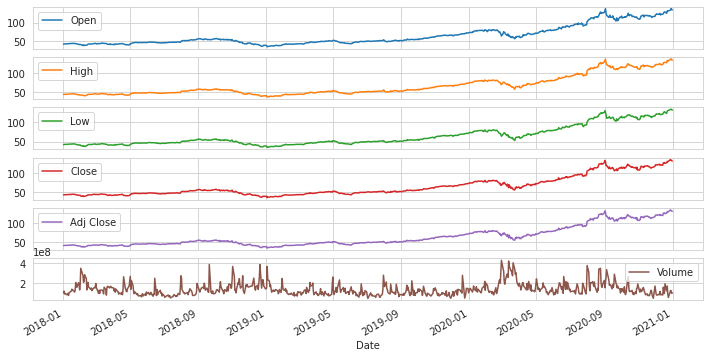

In [8]:
df_aapl.plot(legend=True,subplots=True, figsize = (12, 6))
plt.show()

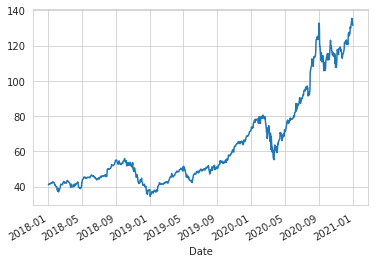

In [9]:
df_aapl["Adj Close"].plot()

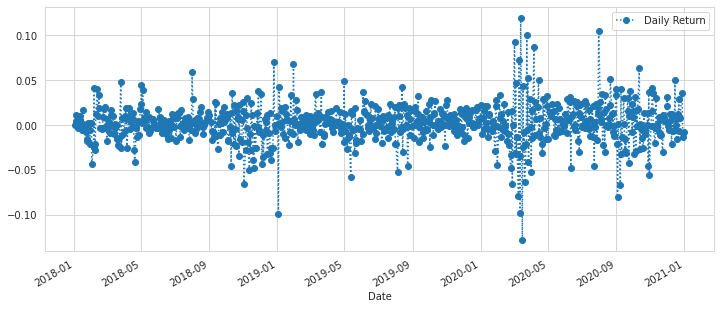

In [10]:
ma_days = [10,50,100]

for ma in ma_days:
    column_name = "MA for %s days" %(str(ma))
    df_aapl[column_name]=pd.DataFrame.rolling(df_aapl['Adj Close'],ma).mean()
df_aapl['Daily Return'] = df_aapl['Adj Close'].pct_change()

# plot the daily return percentage
df_aapl['Daily Return'].plot(figsize=(12,5),legend=True,linestyle=':',marker='o')
plt.show()

In [11]:
df_aapl.reset_index(drop=False, inplace=True)
df_aapl.fillna(df_aapl.mean(), inplace=True)
df_aapl.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  


,Date,Open,High,Low,Close,Adj Close,Volume,MA for 10 days,MA for 50 days,MA for 100 days,Daily Return
0,2018-01-02,42.540001,43.075001,42.314999,43.064999,41.075405,102223600,63.289647,62.275094,61.029189,0.001787
1,2018-01-03,43.132500,43.637501,42.990002,43.057499,41.068256,118071600,63.289647,62.275094,61.029189,-0.000174
2,2018-01-04,43.134998,43.367500,43.020000,43.257500,41.259007,89738400,63.289647,62.275094,61.029189,0.004645
3,2018-01-05,43.360001,43.842499,43.262501,43.750000,41.728760,94640000,63.289647,62.275094,61.029189,0.011385
4,2018-01-08,43.587502,43.902500,43.482498,43.587502,41.573769,82271200,63.289647,62.275094,61.029189,-0.003714


In [12]:
X = []
Y = []
window_size=100
for i in range(1 , len(df_aapl) - window_size -1 , 1):
    first = df_aapl.iloc[i,2]
    temp = []
    temp2 = []
    for j in range(window_size):
        temp.append((df_aapl.iloc[i + j, 2] - first) / first)
    temp2.append((df_aapl.iloc[i + window_size, 2] - first) / first)
    X.append(np.array(temp).reshape(100, 1))
    Y.append(np.array(temp2).reshape(1, 1))

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, shuffle=True)

train_X = np.array(x_train)
test_X = np.array(x_test)
train_Y = np.array(y_train)
test_Y = np.array(y_test)

train_X = train_X.reshape(train_X.shape[0],1,100,1)
test_X = test_X.reshape(test_X.shape[0],1,100,1)

print(len(train_X))
print(len(test_X))

523
131


In [13]:
# For creating model and training
import tensorflow as tf
from tensorflow.keras.layers import Conv1D, LSTM, Dense, Dropout, Bidirectional, TimeDistributed
from tensorflow.keras.layers import MaxPooling1D, Flatten
from tensorflow.keras.regularizers import L1, L2
from tensorflow.keras.metrics import Accuracy
from tensorflow.keras.metrics import RootMeanSquaredError

model = tf.keras.Sequential()

# Creating the Neural Network model here...
# CNN layers
model.add(TimeDistributed(Conv1D(64, kernel_size=3, activation='relu', input_shape=(None, 100, 1))))
model.add(TimeDistributed(MaxPooling1D(2)))
model.add(TimeDistributed(Conv1D(128, kernel_size=3, activation='relu')))
model.add(TimeDistributed(MaxPooling1D(2)))
model.add(TimeDistributed(Conv1D(64, kernel_size=3, activation='relu')))
model.add(TimeDistributed(MaxPooling1D(2)))
model.add(TimeDistributed(Flatten()))
# model.add(Dense(5, kernel_regularizer=L2(0.01)))

# LSTM layers
model.add(Bidirectional(LSTM(100, return_sequences=True)))
model.add(Dropout(0.5))
model.add(Bidirectional(LSTM(100, return_sequences=False)))
model.add(Dropout(0.5))

#Final layers
model.add(Dense(1, activation='linear'))
model.compile(optimizer='adam', loss='mse', metrics=['mse', 'mae'])

history = model.fit(train_X, train_Y, validation_data=(test_X,test_Y), epochs=40,batch_size=40, verbose=1, shuffle =True)

Epoch 1/40
14/14 [==============================] - 12s 208ms/step - loss: 0.0509 - mse: 0.0509 - mae: 0.1696 - val_loss: 0.0301 - val_mse: 0.0301 - val_mae: 0.1302
Epoch 2/40
14/14 [==============================] - 1s 41ms/step - loss: 0.0237 - mse: 0.0237 - mae: 0.1146 - val_loss: 0.0177 - val_mse: 0.0177 - val_mae: 0.1007
Epoch 3/40
14/14 [==============================] - 1s 43ms/step - loss: 0.0164 - mse: 0.0164 - mae: 0.0962 - val_loss: 0.0134 - val_mse: 0.0134 - val_mae: 0.0892
Epoch 4/40
14/14 [==============================] - 1s 43ms/step - loss: 0.0160 - mse: 0.0160 - mae: 0.0947 - val_loss: 0.0152 - val_mse: 0.0152 - val_mae: 0.0920
Epoch 5/40
14/14 [==============================] - 1s 42ms/step - loss: 0.0153 - mse: 0.0153 - mae: 0.0925 - val_loss: 0.0146 - val_mse: 0.0146 - val_mae: 0.0853
Epoch 6/40
14/14 [==============================] - 1s 40ms/step - loss: 0.0138 - mse: 0.0138 - mae: 0.0858 - val_loss: 0.0139 - val_mse: 0.0139 - val_mae: 0.0841
Epoch 7/40
14/14 [==

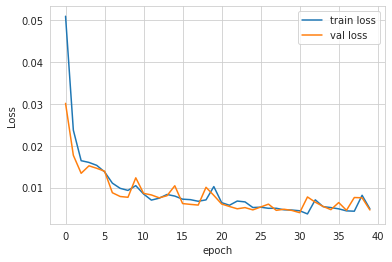

In [14]:
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.xlabel("epoch")
plt.ylabel("Loss")
plt.legend()

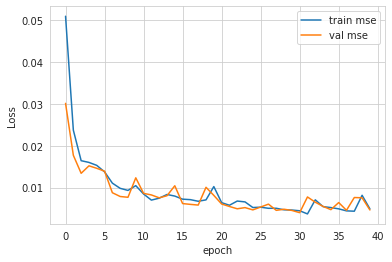

In [15]:
plt.plot(history.history['mse'], label='train mse')
plt.plot(history.history['val_mse'], label='val mse')
plt.xlabel("epoch")
plt.ylabel("Loss")
plt.legend()

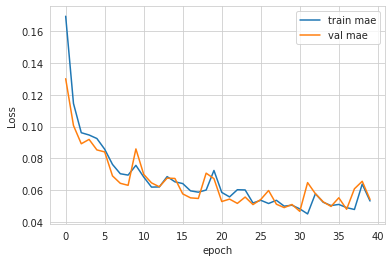

In [16]:
plt.plot(history.history['mae'], label='train mae')
plt.plot(history.history['val_mae'], label='val mae')
plt.xlabel("epoch")
plt.ylabel("Loss")
plt.legend()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 time_distributed (TimeDistr  (None, 1, 98, 64)        256       
 ibuted)                                                         
                                                                 
 time_distributed_1 (TimeDis  (None, 1, 49, 64)        0         
 tributed)                                                       
                                                                 
 time_distributed_2 (TimeDis  (None, 1, 47, 128)       24704     
 tributed)                                                       
                                                                 
 time_distributed_3 (TimeDis  (None, 1, 23, 128)       0         
 tributed)                                                       
                                                                 
 time_distributed_4 (TimeDis  (None, 1, 21, 64)        2

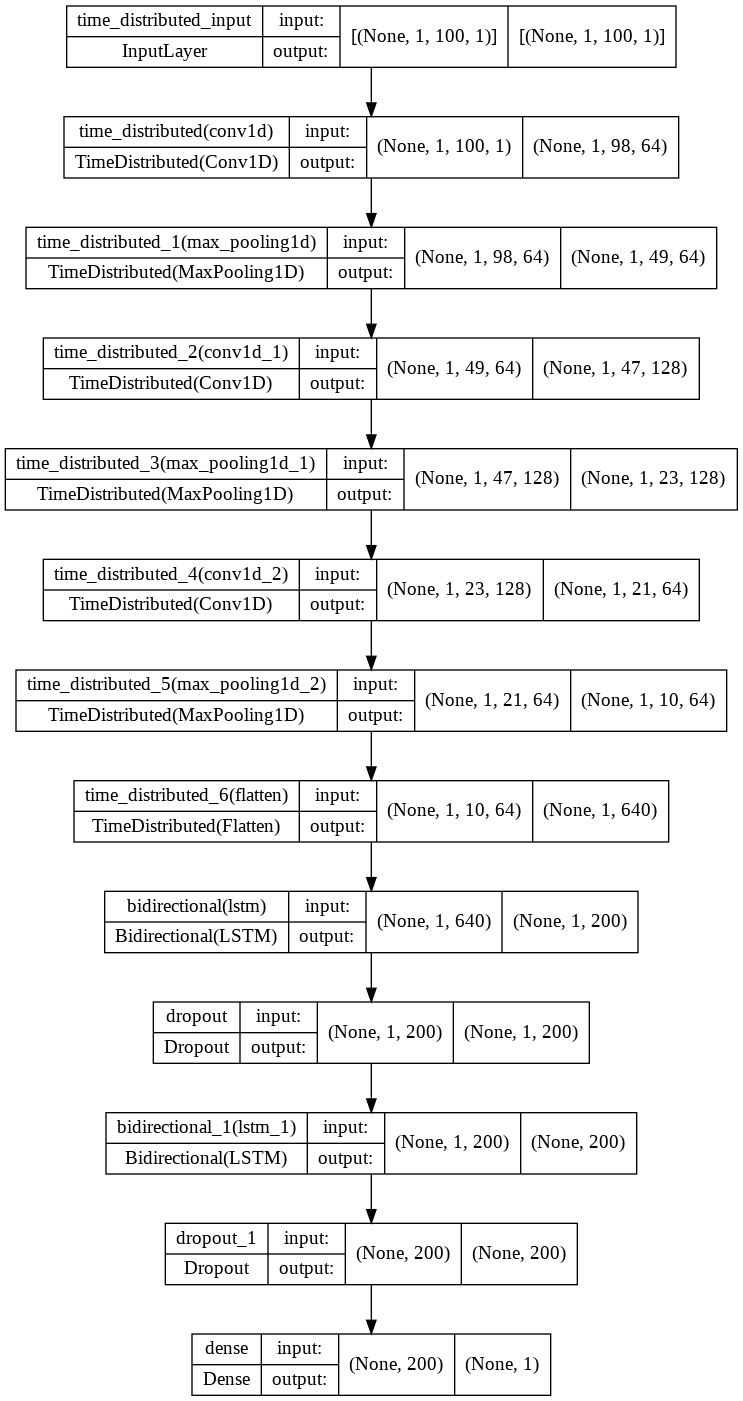

In [17]:
from tensorflow.keras.utils import plot_model
print(model.summary())
plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)

In [18]:
from sklearn.metrics import explained_variance_score, mean_poisson_deviance, mean_gamma_deviance
from sklearn.metrics import r2_score
from sklearn.metrics import max_error

# predict probabilities for test set
yhat_probs = model.predict(test_X, verbose=0)
# reduce to 1d array
yhat_probs = yhat_probs[:, 0]

var = explained_variance_score(test_Y.reshape(-1,1), yhat_probs)
print('Variance: %f' % var)

r2 = r2_score(test_Y.reshape(-1,1), yhat_probs)
print('R2 Score: %f' % var)

var2 = max_error(test_Y.reshape(-1,1), yhat_probs)
print('Max Error: %f' % var2)

Variance: 0.945036
R2 Score: 0.945036
Max Error: 0.228293


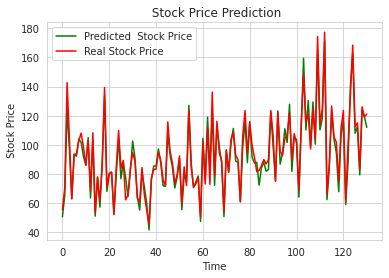

In [20]:
predicted  = model.predict(test_X)
test_label = test_Y.reshape(-1,1)
predicted = np.array(predicted[:,0]).reshape(-1,1)
len_t = len(train_X)
for j in range(len_t , len_t + len(test_X)):
    temp = df_aapl.iloc[j,3]
    test_label[j - len_t] = test_label[j - len_t] * temp + temp
    predicted[j - len_t] = predicted[j - len_t] * temp + temp
plt.plot(predicted, color = 'green', label = 'Predicted  Stock Price')
plt.plot(test_label, color = 'red', label = 'Real Stock Price')
plt.title(' Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel(' Stock Price')
plt.legend()
plt.show()